## Tecnológico de Costa Rica

### Autor: Jorge Andrés Brenes Alfaro

## Red mimetizadora

El código desarrollado a continuación está basado en [1]. La red diseñada es la encargada de reproducir el comprotamiento de entrada y salida de una planta prototipo de péndulo amortiguado a hélice (PAHM).



## Librerías

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv
#from keras.layers import Dense
#from keras.layers import GRU
#from keras.layers import LSTM
#from keras.layers import SimpleRNN
#from keras.models import Sequential
#from keras.optimizers import RMSprop
#from keras.layers import TimeDistributed
#from keras.callbacks import ModelCheckpoint

## Definición del modelo
Se define el espacio de estados de la planta PAHM de la siguiente forma:
$$\dot{x}(t)=A*x(t)+Bu(t)\\
y(t)=C*x(t)$$
Donde:
- A, B y C son matrices.
- x(t) es el estado en el tiempo t.
- u(t) es la entrada externa.
- y(t) es la salida.

## Función para simular la dinámica de la planta

In [2]:
def dinamica_modelo(A,B,C,cond_inicial,input_sequence, time_steps,muestreo):
    I = np.identity(A.shape[0])
    Ad = inv(I - muestreo*A)
    Bd = Ad*muestreo*B
    Xd = np.zeros(shape=(A.shape[0],time_steps + 1))
    Yd = np.zeros(shape=(C.shape[0],time_steps + 1))
    
    for i in range(0,time_steps):
        if i==0:
            Xd[:,[i]] = cond_inicial
            Yd[:,[i]] = C*cond_inicial
            x = Ad*cond_inicial+Bd*input_sequence[i]
        else:
            Xd[:,[i]] = x
            Yd[:,[i]] = C*x
            x = Ad*x+Bd*input_sequence[i]
            
    Xd[:,[-1]] = x
    Yd[:,[-1]] = C*x
    return Xd, Yd

In [3]:
# Definición del modelo en tiempo continuo
A = np.matrix([[0, 1],[-0.9413, -0.149]])
B = np.matrix([[0],[0.149]])
C = np.matrix([[1, 0]])

# Definición del tiempo de muestreo
tiempo = 200
sampling = 0.2

input_seq_train = np.random.rand(tiempo,1) # Secuencia de entrada para la simulación
                                           # Es aleatoria para que sea rica en información
x0_train = np.random.rand(2,1) # Condición inicial
input_seq=np.ones(tiempo)
#plt.plot(input_seq_train)

# Dinámica de la planta
state,output_train=dinamica_modelo(A,B,C,x0_train,input_seq,tiempo,sampling)  

Text(0.5, 1.0, 'Respuesta al escalón')

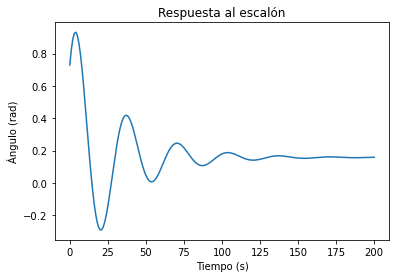

In [5]:
plt.plot(output_train[0,:])
plt.xlabel('Tiempo (s)')
plt.ylabel('Ángulo (rad)')
plt.title('Respuesta al escalón')

## Creación de datos

## Creación de la red

## Gráficos
Esta sección consta de graficar los resultados de la predicción, así como las pérdidas

## Bibliografía
-H. Kapasi, 2022. "Modeling Non-Linear Dynamic Systems with Neural Networks", 2022. [En línea]. Disponible en: https://towardsdatascience.com/modeling-non-linear-dynamic-systems-with-neural-networks-f3761bc92649. [Accesado el 7 de marzo del 2022].